1b

In [1]:
!pip install tensorflow==1.14.0
import tensorflow as tf
print(tf.__version__)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

1.14.0


/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

In [2]:
import numpy as np

train_data = [[0, 0, 0, 0, 0, 0, 0, 0, 0,
               0, 0, 0, 0, 1, 0, 0, 0, 0,
               0, 0, 1, 0, 1, 0, 1, 0, 0,
               0, 0, 1, 1, 1, 1, 1, 0, 0,
               0, 0, 1, 1, 1, 1, 1, 0, 0,
               0, 0, 1, 1, 1, 1, 1, 0, 0,
               0, 0, 1, 1, 1, 1, 1, 0, 0,
               0, 0, 1, 0, 0, 0, 1, 0, 0,
               0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0,
               0, 0, 0, 0, 1, 0, 0, 0, 0,
               0, 0, 0, 1, 1, 1, 0, 0, 0,
               0, 0, 1, 1, 1, 1, 1, 0, 0,
               0, 1, 1, 1, 1, 1, 1, 1, 0,
               0, 1, 0, 0, 1, 1, 0, 1, 0,
               0, 1, 1, 1, 1, 1, 1, 1, 0,
               0, 1, 1, 1, 1, 1, 1, 1, 0,
               0, 0, 0, 0, 0, 0, 0, 0, 0]]

train_label = [1, 0]

weights = np.zeros((81))
bias = 0.3
epoch = 7000
learning_rate = 0.1


def predict(inputs):
    summation = np.dot(inputs, weights) + bias
    if summation > 0:
        activation = 1
    else:
        activation = 0
    return activation


def train(training_inputs, labels):
    global bias
    for inputs, label in zip(training_inputs, labels):
        prediction = predict(inputs)
        weights[0:] += learning_rate * np.dot((label - prediction), inputs)
        bias += learning_rate * (label - prediction)


for _ in range(epoch):
    train(train_data, train_label)

test_data = [[0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 1, 0, 0, 0, 0,
              0, 0, 1, 0, 1, 0, 1, 0, 0,
              0, 0, 1, 1, 1, 1, 1, 0, 0,
              0, 0, 1, 1, 1, 1, 1, 0, 0,
              0, 0, 1, 1, 1, 1, 1, 0, 0,
              0, 0, 1, 1, 1, 1, 1, 0, 0,
              0, 0, 1, 0, 0, 0, 1, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0]]
data = [[0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 1, 0, 0, 0, 0,
         0, 0, 0, 1, 1, 1, 0, 0, 0,
         0, 0, 1, 1, 1, 1, 1, 0, 0,
         0, 1, 1, 1, 1, 1, 1, 1, 0,
         0, 1, 0, 0, 1, 1, 0, 1, 0,
         0, 1, 1, 1, 1, 1, 1, 1, 0,
         0, 1, 1, 1, 1, 1, 1, 1, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0]]


for i in range(81) :
  test_data[0][i] = 1
  if predict(test_data)!=1:
    state = i
    print (f'tank : {state}')
    break

for j in range(81) :
  data[0][j] = 0
  state = 0 
  if predict(data)!=0:
    state = j
    print (f'house : {state}')
    break
    if state==81:
      print ('salah ini')
  


tank : 61
house : 67


3

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
(1437, 64)
(1437, 10)
(360, 64)
(360, 10)
(?, 64)
(?, 10)
Epoch-0 Accuracy: 0.10000000149011612
Epoch-1000 Accuracy: 0.09166666865348816
Epoch-2000 Accuracy: 0.09166666865348816
Epoch-3000 Accuracy: 0.09166666865348816
Epoch-4000 Accuracy: 0.6861110925674438
Epoch-5000 Accuracy: 0.7083333134651184
Epoch-6000 Accuracy: 0.7250000238418579
Epoch-7000 Accuracy: 0.7805555462837219
Epoch-8000 Accuracy: 0.8138889074325562
Epoch-9000 Accuracy: 0.8694444298744202
Epoch-10000 Accuracy: 0.9055555462837219
Epoch-11000 Accuracy: 0.9166666865348816
Epoch-12000 Accuracy: 0.9222221970558167
Epoch-13000 Accuracy: 0.9305555820465088
Epoch-14000 Accuracy: 0.9361110925674438
Epoch-15000 Accuracy: 0.9388889074325562
Epoch-16000 Accuracy: 0.9388889074325562
Epoch-17000 Accuracy: 0.9388889074325562
Epoch-18000 Accuracy: 0.9388889074325562
Epoch-19000 Accuracy: 0.9388889074325562
Epoch-20000 Accuracy: 0.9416666626930

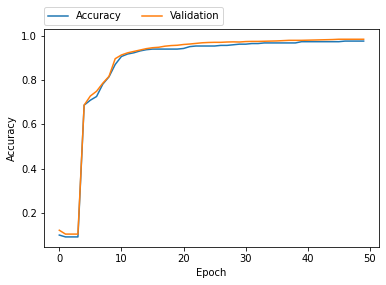

In [3]:
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import datasets,svm
from sklearn.datasets import load_digits
from sklearn.metrics import classification_report



def load_data():
    digits = load_digits()
    n_samples = len(digits.images)
    x_data = digits['images']
    y_data = digits['target']
    return x_data, y_data

x_data, y_data = load_data()
x_data = x_data.reshape((len(x_data), -1))
y_data = y_data.reshape(y_data.shape[0],-1)

scaler = MinMaxScaler()
x_data = scaler.fit_transform(x_data)

encoder = OneHotEncoder(sparse=False)
y_data = encoder.fit_transform(y_data)

layer = {
    'input' : 64,
    'hidden' : 66,
    'output' : 10
}

weight = {
    'to_hidden' : tf.Variable(tf.random_normal([layer['input'],layer['hidden']])),
    'to_output' : tf.Variable(tf.random_normal([layer['hidden'],layer['output']]))
}

bias = {
    'to_hidden' : tf.Variable(tf.random_normal([layer['hidden']])),
    'to_output' : tf.Variable(tf.random_normal([layer['output']]))
}


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size= .2)
#dia random terus ambil 20% di test 80% di train

x = tf.placeholder(tf.float32, [None, layer['input']])
target = tf.placeholder(tf.float32, [None,layer['output']])

def predict():
    wx_b1= tf.matmul(x, weight['to_hidden']) + bias['to_hidden']
    y1= tf.nn.sigmoid(wx_b1)

    wx_b2= tf.matmul(y1, weight['to_output']) + bias['to_output']
    y2= tf.nn.sigmoid(wx_b2)
    return y2

y= predict()
epoch = 50000
alpha = 0.5
error = tf.reduce_mean(0.5 * (target - y) **2)
optimizer = tf.train.GradientDescentOptimizer(alpha)
train = optimizer.minimize(error)
acclist = []
vallist=[]
predlist = []

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

print(x.shape)
print(target.shape)

with tf.Session() as sess: 
    sess.run(tf.global_variables_initializer())
    for i in range (epoch) :
        sess.run(train, feed_dict={x:x_train, target:y_train})
        
        if i % 1000 == 0 :
            true_prediction = tf.equal(tf.argmax(y, axis=1),tf.argmax(target, axis=1))
            accuracy = tf.reduce_mean(tf.cast(true_prediction,tf.float32))
            acc = sess.run (accuracy, feed_dict= {
                x:x_test,
                target: y_test
            })
            prediction = tf.argmax(y, axis=1)
            predprint = sess.run(prediction,feed_dict={
                x: x_test,
                target: y_test
            })

            acctrain = sess.run (accuracy, feed_dict= {
                x:x_train,
                target: y_train
            })
            #vallist.append(scores)
            predlist.append(acctrain)
            acclist.append(acc)

            print('Epoch-{} Accuracy: {}'.format(i,acc))

feature = [0,1,2,3,4,5,6,7,8,9]
y_test = y_test.dot(feature).astype(int)


#b
print(classification_report(y_test,predprint, digits=3))

#a

import matplotlib.pyplot as plt
plt.plot(acclist, label='Accuracy')
plt.plot(predlist,label='Validation')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, borderaxespad=0.)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


4 a

In [0]:
import numpy as np


def sigmoid(x):
    ''' Sigmoid like function using tanh '''
    return np.tanh(x)


def dsigmoid(x):
    ''' Derivative of sigmoid above '''
    return 1.0-x**2


class Elman:
    ''' Elamn network '''


    def __init__(self, *args):
        ''' Initialization of the perceptron with given sizes.  '''

        self.shape = args
        n = len(args)

        # Build layers
        self.layers = []

        # Input layer (+1 unit for bias
        #              +size of first hidden layer)
        self.layers.append(np.ones(self.shape[0]+1+self.shape[1]))

        # Hidden layer(s) + output layer
        for i in range(1,n):
            self.layers.append(np.ones(self.shape[i]))

        # Build weights matrix
        self.weights = []
        for i in range(n-1):
            self.weights.append(np.zeros((self.layers[i].size,
                                          self.layers[i+1].size)))

        # dw will hold last change in weights (for momentum)
        self.dw = [0,]*len(self.weights)

        # Reset weights
        self.reset()


    def reset(self):
        ''' Reset weights '''

        for i in range(len(self.weights)):
            Z = np.random.random((self.layers[i].size,self.layers[i+1].size))
            self.weights[i][...] = (2*Z-1)*0.25


    def propagate_forward(self, data):
        ''' Propagate data from input layer to output layer. '''

        # Set input layer with data
        self.layers[0][:self.shape[0]] = data
        # and first hidden layer
        self.layers[0][self.shape[0]:-1] = self.layers[1]

        # Propagate from layer 0 to layer n-1 using sigmoid as activation function
        for i in range(1,len(self.shape)):
            # Propagate activity
            self.layers[i][...] = sigmoid(np.dot(self.layers[i-1],self.weights[i-1]))

        # Return output
        return self.layers[-1]


    def propagate_backward(self, target, lrate=0.1, momentum=0.1):
        ''' Back propagate error related to target using lrate. '''

        deltas = []

        # Compute error on output layer
        error = target - self.layers[-1]
        delta = error*dsigmoid(self.layers[-1])
        deltas.append(delta)

        # Compute error on hidden layers
        for i in range(len(self.shape)-2,0,-1):
            delta = np.dot(deltas[0],self.weights[i].T)*dsigmoid(self.layers[i])
            deltas.insert(0,delta)
            
        # Update weights
        for i in range(len(self.weights)):
            layer = np.atleast_2d(self.layers[i])
            delta = np.atleast_2d(deltas[i])
            dw = np.dot(layer.T,delta)
            self.weights[i] += lrate*dw + momentum*self.dw[i]
            self.dw[i] = dw

        # Return error
        return (error**2).sum()


# -----------------------------------------------------------------------------
if __name__ == '__main__':
    import matplotlib
    import matplotlib.pyplot as plt

    # Example 1: learning a simple time serie
    # -------------------------------------------------------------------------
    network = Elman(4,8,4)
    samples = np.zeros(6, dtype=[('input',  float, 4), ('output', float, 4)])
    samples[0]  = (1,0,0,0), (0,1,0,0)
    samples[1]  = (0,1,0,0), (0,0,1,0)
    samples[2]  = (0,0,1,0), (0,0,0,1)
    samples[3]  = (0,0,0,1), (0,0,1,0)
    samples[4]  = (0,0,1,0), (0,1,0,0)
    samples[5]  = (0,1,0,0), (1,0,0,0)
    for i in range(5000):
        n = i%samples.size
        network.propagate_forward(samples['input'][n])
        network.propagate_backward(samples['output'][n])
    for i in range(samples.size):
        o = network.propagate_forward( samples['input'][i] )
        print ('Sample %d: %s -> %s' % (i, samples['input'][i], samples['output'][i]))
        print ('               Network output: %s' % (o == o.max()).astype(float))
       